In [7]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [8]:

labels = np.load("data/CIFAR-10-C/labels.npy").squeeze()[:10000]
one_hot = np.zeros((len(labels), 11))
one_hot[np.arange(len(labels)), labels] = 1
reward_all = (4+1)*one_hot - 4
reward_all[:, -1] = 0

In [9]:
rl_run_names = ['rl_mc4_seed1', 'rl_mc4_seed2', 'rl_mc4_seed3', 'rl_mc4_seed4', 'rl_mc4_seed5']
bc_run_names = ['xent11_seed0', 'xent11_seed1', 'xent11_seed2', 'xent11_seed3', 'xent11_seed4']
oracle_run_names = ['xent_ls0._seed1', 'xent_ls0._seed2', 'xent_ls0._seed3', 'xent_ls0._seed4', 'xent_ls0._seed5']

corruption_types = ['impulse_noise', 'shot_noise', 'defocus_blur', 'motion_blur', 'speckle_noise']
corruption_types_titles = ["Impulse Noise", "Shot Noise", "Defocus Blur", "Motion Blur", "Speckle Noise"]


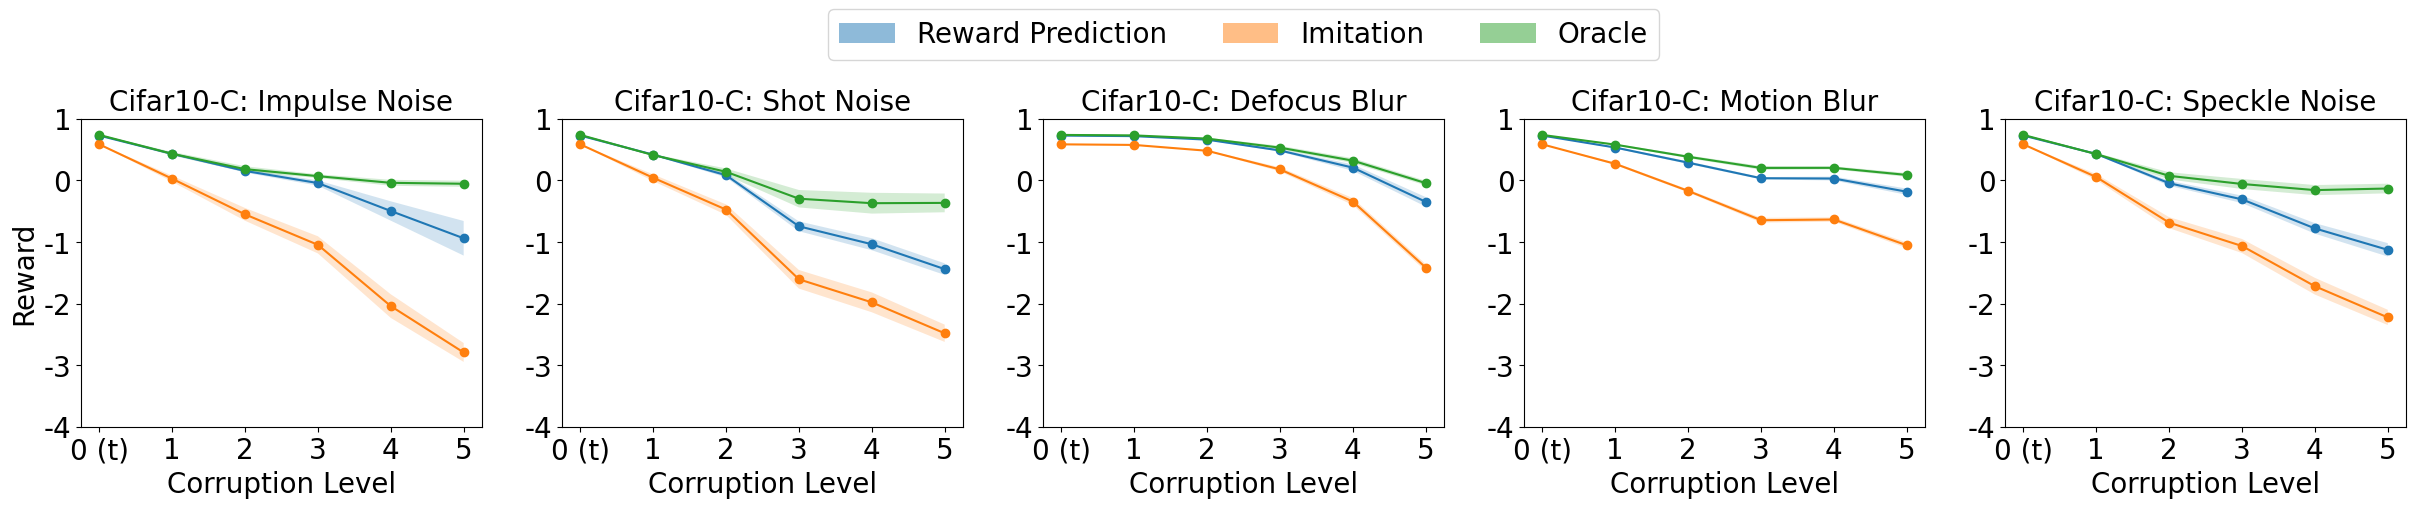

In [10]:
# make subplots with 5 plots horizontally
fig, axs = plt.subplots(1, 5, figsize=(30, 4))

for j in range(5):
    corruption_type = corruption_types[j]

    rl_rewards_seed_corr = np.zeros((5, 6))
    rl_abstain_ratio_seed_corr = np.zeros((5, 6))
    for i in range(5):
        rl_run_name = rl_run_names[i]
        outputs_all = pickle.load(open('data/{}/outputs_{}.pkl'.format(rl_run_name, corruption_type), 'rb'))
        for corruption_level in range(6):
            outputs = outputs_all[corruption_level]
            best_pred_actions = np.argmax(outputs, axis=-1)
            rewards = reward_all[np.arange(len(labels)), best_pred_actions]
            rl_rewards_seed_corr[i, corruption_level] = rewards.mean()
            rl_abstain_ratio_seed_corr[i, corruption_level] = (best_pred_actions == 10).mean()

    bc_rewards_seed_corr = np.zeros((5, 6))
    bc_abstain_ratio_seed_corr = np.zeros((5, 6))
    for i in range(5):
        bc_run_name = bc_run_names[i]
        outputs_all = pickle.load(open('data/{}/baseline_outputs_{}.pkl'.format(bc_run_name, corruption_type), 'rb'))
        for corruption_level in range(6):
            outputs = outputs_all[corruption_level]
            best_pred_actions = np.argmax(outputs, axis=-1)
            rewards = reward_all[np.arange(len(labels)), best_pred_actions]
            bc_rewards_seed_corr[i, corruption_level] = rewards.mean()
            bc_abstain_ratio_seed_corr[i, corruption_level] = (best_pred_actions == 10).mean()

    oracle_rewards_seed_corr = np.zeros((5, 6))
    oracle_abstain_ratio_seed_corr = np.zeros((5, 6))
    for i in range(5):
        oracle_run_name = oracle_run_names[i]
        infos_all = pickle.load(open('data/{}/oracle_outputs_{}.pkl'.format(oracle_run_name, corruption_type), 'rb'))
        for corruption_level in range(6):
            infos = infos_all[corruption_level]
            best_pred_actions = infos[:, 1]
            rewards = infos[:, 0]
            oracle_rewards_seed_corr[i, corruption_level] = rewards.mean()
            oracle_abstain_ratio_seed_corr[i, corruption_level] = (best_pred_actions == 10).mean()
    
    axs[j].plot(np.arange(6), rl_rewards_seed_corr.mean(axis=0), 'o-')
    axs[j].fill_between(np.arange(6), rl_rewards_seed_corr.mean(axis=0)-rl_rewards_seed_corr.std(axis=0), rl_rewards_seed_corr.mean(axis=0)+rl_rewards_seed_corr.std(axis=0), alpha=0.2)
    axs[j].plot(np.arange(6), bc_rewards_seed_corr.mean(axis=0), 'o-')
    axs[j].fill_between(np.arange(6), bc_rewards_seed_corr.mean(axis=0)-bc_rewards_seed_corr.std(axis=0), bc_rewards_seed_corr.mean(axis=0)+bc_rewards_seed_corr.std(axis=0), alpha=0.2)
    axs[j].plot(np.arange(6), oracle_rewards_seed_corr.mean(axis=0), 'o-')
    axs[j].fill_between(np.arange(6), oracle_rewards_seed_corr.mean(axis=0)-oracle_rewards_seed_corr.std(axis=0), oracle_rewards_seed_corr.mean(axis=0)+oracle_rewards_seed_corr.std(axis=0), alpha=0.2)
    axs[j].set_xticks(np.arange(6), ['0 (t)', '1', '2', '3', '4', '5'], fontsize=20)
    axs[j].set_yticks(np.arange(-4, 2, 1),np.arange(-4, 2, 1), fontsize=20)
    axs[j].set_xlabel('Corruption Level', fontsize=20)
    axs[0].set_ylabel('Reward', fontsize=20)
    axs[j].set_ylim(-4, 1)
    axs[j].set_title("Cifar10-C: "+corruption_types_titles[j], fontsize=20)

# 
# axs[2].legend(loc="upper center", ncol=3, fontsize=20)
axs[2].fill_between(np.arange(6), 0, 0, facecolor='C0', alpha=0.5, label='Reward Prediction')
axs[2].fill_between(np.arange(6), 0, 0, facecolor='C1', alpha=0.5, label='Imitation')
axs[2].fill_between(np.arange(6), 0, 0, facecolor='C2', alpha=0.5, label='Oracle')

# put legend above the figure
axs[2].legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), ncol=3, fontsize=20)


# plt.legend(fontsize=15)

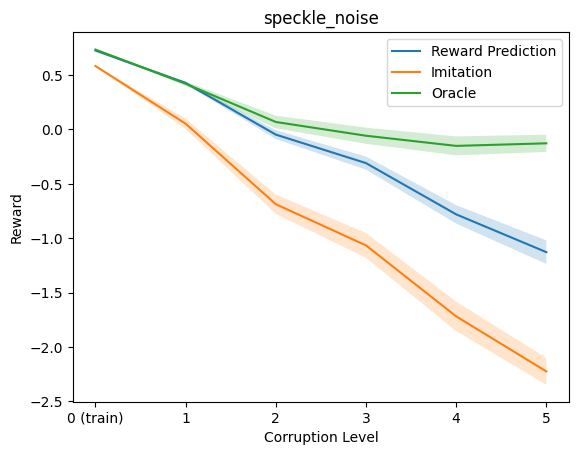

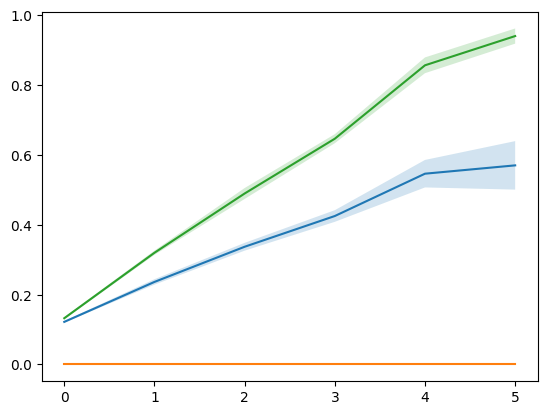

In [26]:
plt.plot(np.arange(6), rl_abstain_ratio_seed_corr.mean(axis=0), label='RL')
plt.fill_between(np.arange(6), rl_abstain_ratio_seed_corr.mean(axis=0)-rl_abstain_ratio_seed_corr.std(axis=0), rl_abstain_ratio_seed_corr.mean(axis=0)+rl_abstain_ratio_seed_corr.std(axis=0), alpha=0.2)
plt.plot(np.arange(6), bc_abstain_ratio_seed_corr.mean(axis=0), label='RL')
plt.fill_between(np.arange(6), bc_abstain_ratio_seed_corr.mean(axis=0)-bc_abstain_ratio_seed_corr.std(axis=0), bc_abstain_ratio_seed_corr.mean(axis=0)+bc_abstain_ratio_seed_corr.std(axis=0), alpha=0.2)
plt.plot(np.arange(6), oracle_abstain_ratio_seed_corr.mean(axis=0), label='RL')
plt.fill_between(np.arange(6), oracle_abstain_ratio_seed_corr.mean(axis=0)-oracle_abstain_ratio_seed_corr.std(axis=0), oracle_abstain_ratio_seed_corr.mean(axis=0)+oracle_abstain_ratio_seed_corr.std(axis=0), alpha=0.2)